In [24]:
import requests
import pandas as pd
from tqdm import tqdm 
import time
import pars
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata 
import plotly.graph_objs as go
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# asset_code = 'SBER'    
# option_data_df = pars.collect_option_data(asset_code)

In [ ]:
# output_file = f"{asset_code}_options_data.csv"
# option_data_df.to_csv(output_file, index=False)

In [9]:
option_data_df = pd.read_csv('SBER_options_data.csv')

# Описание выгруженного датафрейма

Датафрейм содержит информацию об опционах на актив (например, акции Сбербанка — `SBER`). Каждая строка соответствует одному опциону, а столбцы содержат различные характеристики опциона. Ниже приведено подробное описание столбцов.

---

## Столбцы датафрейма

### 1. **`secid`** (`str`)
- **Описание**: Уникальный идентификатор опциона.
- **Пример**: `"SR260CC5A"`.

### 2. **`asset_code`** (`str`)
- **Описание**: Код базового актива, на который выпущен опцион.
- **Пример**: `"SBER"`.

### 3. **`asset_type`** (`str`)
- **Описание**: Тип базового актива (например, акция, фьючерс).
- **Пример**: `"share"`.

### 4. **`futures_code`** (`str` или `None`)
- **Описание**: Код связанного фьючерса (если опцион основан на фьючерсе).
- **Пример**: `None` (если опцион основан на акции).

### 5. **`expiration_date`** (`str`)
- **Описание**: Дата экспирации опциона в формате `YYYY-MM-DD`.
- **Пример**: `"2025-03-05"`.

### 6. **`series_type`** (`str`)
- **Описание**: Тип серии опциона (например, недельная, месячная).
- **Пример**: `"W"` (недельная серия).

### 7. **`strike`** (`float`)
- **Описание**: Страйк-цена опциона (цена исполнения).
- **Пример**: `260.0`.

### 8. **`option_type`** (`str`)
- **Описание**: Тип опциона: `"call"` (колл) или `"put"` (пут).
- **Пример**: `"call"`.

### 9. **`delta`** (`float`)
- **Описание**: Дельта опциона — чувствительность цены опциона к изменению цены базового актива.
- **Пример**: `0.992773`.

### 10. **`gamma`** (`float`)
- **Описание**: Гамма опциона — скорость изменения дельты.
- **Пример**: `0.000893`.

### 11. **`vega`** (`float`)
- **Описание**: Вега опциона — чувствительность цены опциона к изменению волатильности.
- **Пример**: `0.005626`.

### 12. **`theta`** (`float`)
- **Описание**: Тета опциона — чувствительность цены опциона к изменению времени до экспирации.
- **Пример**: `-0.074993`.

### 13. **`rho`** (`float`)
- **Описание**: Ро опциона — чувствительность цены опциона к изменению процентной ставки.
- **Пример**: `0.021181`.

### 14. **`days_until_expiring`** (`int`)
- **Описание**: Количество дней до экспирации опциона.
- **Пример**: `3`.

### 15. **`underlying_price`** (`float`)
- **Описание**: Текущая цена базового актива.
- **Пример**: `309.63`.

### 16. **`volatility`** (`float`)
- **Описание**: Волатильность опциона (в процентах).
- **Пример**: `79.97213`.

### 17. **`underlying_asset`** (`str`)
- **Описание**: Название базового актива.
- **Пример**: `"SBER"`.

### 18. **`underlying_type`** (`str`)
- **Описание**: Тип базового актива (например, акция).
- **Пример**: `"share"`.

### 19. **`theorprice`** (`float`)
- **Описание**: Теоретическая цена опциона, рассчитанная моделью (например, Блэка-Шоулза).
- **Пример**: `49.684348`.

### 20. **`fee`** (`float`)
- **Описание**: Комиссия за опцион.
- **Пример**: `0.05`.

### 21. **`lastprice`** (`float`)
- **Описание**: Последняя цена опциона.
- **Пример**: `309.63`.

### 22. **`settleprice`** (`float`)
- **Описание**: Расчетная цена опциона.
- **Пример**: `309.63`.

---

## Пример строки датафрейма

```plaintext
secid          SR260CC5A
asset_code     SBER
asset_type     share
futures_code   None
expiration_date 2025-03-05
series_type    W
strike         260.0
option_type    call
delta          0.992773
gamma          0.000893
vega           0.005626
theta          -0.074993
rho            0.021181
days_until_expiring 3
underlying_price 309.63
volatility     79.97213
underlying_asset SBER
underlying_type share
theorprice     49.684348
fee            0.05
lastprice      309.63
settleprice    309.63

# Поверхность

In [40]:
option_data_df = pd.read_csv('SBER_options_data.csv')
option_data_df

,secid,asset_code,asset_type,futures_code,expiration_date,series_type,strike,option_type,delta,gamma,...,days_until_expiring,underlying_price,volatility,underlying_asset,underlying_type,theorprice,fee,expiring_date,lastprice,settleprice
0,SR250CD5B,SBER,share,NaN,2025-04-09,W,250.0,call,0.996964,0.000410,...,6,305.37,57.64578,SBER,share,55.391154,0.05,2025-04-09,305.37,305.37
1,SR250CP5B,SBER,share,NaN,2025-04-09,W,250.0,put,-0.003036,0.000410,...,6,305.37,57.64578,SBER,share,0.021154,0.03,2025-04-09,305.37,305.37
2,SR260CD5B,SBER,share,NaN,2025-04-09,W,260.0,call,0.995499,0.000692,...,6,305.37,48.60806,SBER,share,45.397307,0.05,2025-04-09,305.37,305.37
3,SR260CP5B,SBER,share,NaN,2025-04-09,W,260.0,put,-0.004501,0.000692,...,6,305.37,48.60806,SBER,share,0.027307,0.03,2025-04-09,305.37,305.37
4,SR270CD5B,SBER,share,NaN,2025-04-09,W,270.0,call,0.990484,0.001574,...,6,305.37,41.41527,SBER,share,35.422887,0.05,2025-04-09,305.37,305.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,SR395CR9,SBER,share,NaN,2029-06-20,Q,395.0,put,-0.529861,0.002020,...,1539,306.03,31.33457,SBER,share,139.518900,0.06,2029-06-20,306.03,306.03
984,SR400CF9,SBER,share,NaN,2029-06-20,Q,400.0,call,0.464116,0.002006,...,1539,306.03,31.52216,SBER,share,49.850844,0.06,2029-06-20,306.03,306.03
985,SR400CR9,SBER,share,NaN,2029-06-20,Q,400.0,put,-0.535884,0.002006,...,1539,306.03,31.52216,SBER,share,143.820844,0.06,2029-06-20,306.03,306.03
986,SR405CF9,SBER,share,NaN,2029-06-20,Q,405.0,call,0.458273,0.001991,...,1539,306.03,31.70924,SBER,share,49.179430,0.06,2029-06-20,306.03,306.03


строим неоткаллиброваннуб поверхность

In [41]:
strikes = option_data_df['strike'].values
days_until_expiring = option_data_df['days_until_expiring'].values
volatility = option_data_df['volatility'].values /100

strike_grid, days_grid = np.meshgrid(
    np.linspace(min(strikes), max(strikes), 100),
    np.linspace(min(days_until_expiring), max(days_until_expiring), 100)
)

volatility_grid = griddata(
    (strikes, days_until_expiring), 
    volatility,  
    (strike_grid, days_grid), 
    method='cubic'  
)

fig = go.Figure(data=[go.Surface(
    z=volatility_grid,
    x=strike_grid,
    y=days_grid,
    colorscale='Viridis',
    colorbar=dict(title='Volatility'),
    opacity=0.8
)])

fig.update_layout(
    scene=dict(
        xaxis_title='Strike Price',
        yaxis_title='Days Until Expiration',
        zaxis_title='Volatility'
    ),
    title='Volatility Surface for SBER Options',
    width=800,
    height=600
)

fig.show()

далее займемся калибровкой модели, чтобы убедиться, что на поверхности нет арбитража, что мы получили гладкую поверхностью без складочек

# Параметрическая калибровка 

https://assets.pubpub.org/2mb1ofl8/61672339219188.pdf


https://hal.science/hal-02517572/document

Рассмотрим модель SVI (Stochastic Volatility Inspired)

Поверхность волатильности зависит как от страйка (денежности, это нормированный страй в некотором смысле), так и от времени до экспирации. Значит, необходимо калибровать параметры модели SVI для каждого срока отдельно, а затем убедиться, что между разными сроками нет календарного арбитража. Это включает проверку того, что общая дисперсия для каждого срока увеличивается с увеличением времени до экспирации.


собственно, изначально эта модель не строится так, что нет календарного арбитража, в этом ее слабая сторона. мы можем просто откалибровать отсуствие баттерфлай арбитража, а гарантий на отсуствие календарного у нас. однако попробуем реализовать.

Модель SVI (Stochastic Volatility Inspired) используется для описания поверхности подразумеваемой волатильности. 
Каждый параметр $ \chi_R = \{a, b, \rho, m, \sigma\} $ влияет на форму кривой волатильности следующим образом:


**1. Параметр a : Общий уровень дисперсии**
- **Роль:** Определяет вертикальный сдвиг кривой.
- **Влияние:**
  - Увеличение $ a $  поднимает всю кривую вверх, равномерно повышая волатильность для всех страйков.
  - Уменьшение $ a $ опускает кривую, снижая общий уровень волатильности.
- **Пример:** Если $ a = 0.1 $, а затем увеличивается до $ a = 0.2 $, кривая станет выше, сохраняя свою форму.

 **2. Параметр b : Наклон крыльев**
- **Роль:** Контролирует крутизну левого и правого крыльев.
- **Влияние:**
  - Увеличение $ b $ делает оба крыла более крутыми, усиливая волатильность для экстремальных страйков (ITM и OTM).
  - Уменьшение $ b $ сглаживает крылья, снижая волатильность для удалённых страйков.
- **Пример:** При $ b = 0.1 $ улыбка имеет пологие крылья, при $ b = 0.3 $ крылья становятся резче.

**3. Параметр $ \rho $: Асимметрия улыбки**
- **Роль:** Определяет поворот кривой.
- **Влияние:**
  - Увеличение $ \rho $ делает **правое крыло** круче, а **левое** — положе (поворот против часовой стрелки).
  - Уменьшение $ \rho $ (вплоть до отрицательных значений) усиливает левое крыло.
- **Пример:** При $ \rho = 0.5 $ кривая отражает ожидания роста волатильности при росте цены актива.

**4. Параметр  m : Горизонтальный сдвиг**
- **Роль:** Смещает точку минимальной волатильности (ATM).
- **Влияние:**
  - Увеличение $ m $ сдвигает кривую вправо, минимум волатильности соответствует более высоким страйкам.
  - Уменьшение $ m $ смещает кривую влево.
- **Пример:** Если $ m = 0 $, минимум находится при текущей форвардной цене. При $ m = 0.1 $ минимум смещается вправо.

**5. Параметр  $\sigma$ : Кривизна вблизи ATM**
- **Роль:** Контролирует «остроту» улыбки вблизи ATM.
- **Влияние:**
  - Увеличение  $\sigma$  делает улыбку более плоской в центральной части, снижая кривизну.
  - Уменьшение  $\sigma$  усиливает пик вблизи ATM.
- **Пример:** При $\sigma = 0.1$  улыбка имеет выраженный пик, при $\sigma = 0.3$ пик сглаживается.

какие могут быть арбитражи в модели:
- баттерфлай арбитраж
- календарный арбитраж

отсутствие этих арбитражей мы будем проверять при поиске оптимальных параметров


**Баттерфлай-арбитраж:**

Баттерфляй-арбитраж возникает, когда **плотность риска (risk-neutral density, RND)** становится отрицательной. Для call-опционов RND вычисляется как:
$$
\text{RND}(K) = e^{rT} \frac{\partial^2 C}{\partial K^2},
$$
где $ C $ — цена опциона, $ K $ — страйк. Условие отсутствия арбитража: $ \text{RND}(K) \geq 0 $.


В модели SVI полная дисперсия $ w(k) = \sigma_{\text{impl}}^2 \cdot T $ связана с RND через формулу Gatheral:
$$
g(k) = \left(1 - \frac{k w'}{2w}\right)^2 - \frac{(w')^2}{4}\left(\frac{1}{w} + \frac{1}{4}\right) + \frac{w''}{2},
$$
где $ w^, = \frac{dw}{dk} $, $ w^{,,} = \frac{d^2w}{dk^2} $.  
**Условие отсутствия арбитража**: $ g(k) \geq 0 $ для всех $ k $.


разберемся, что считаем в коде

**Компоненты:**
1. **term1**: Квадрат отклонения от линейности.  
   Отражает, насколько форма улыбки волатильности соответствует "естественной" форме без арбитража.

2. **term2**: Штраф за крутизну улыбки.  
   Контролирует, чтобы наклон $ w(k)$ не приводил к отрицательной плотности.

3. **term3**: Учёт кривизны.  
   Гарантирует, что вогнутость/выпуклость улыбки физически возможна.


**Почему именно такая проверка?**
- **Физический смысл**: Формула \( g(k) \) прямо следует из требования \( \text{RND}(K) \geq 0 \).
- **Связь с плотностью**: При \( g(k) < 0 \) плотность риска становится отрицательной, что позволяет создать арбитражную стратегию (баттерфляй).
- **Численный допуск** `1e-6`: Учитывает погрешности вычислений с плавающей точкой.


In [36]:
strikes = option_data_df['strike'].values
days_until_expiring = option_data_df['days_until_expiring'].values
implied_vols = option_data_df['volatility'].values / 100  


expiries = np.unique(days_until_expiring) / 365
unique_strikes = np.unique(strikes)

In [35]:
from scipy.optimize import minimize

In [73]:
def svi(params, x):
    a, b, rho, m, s = params
    # тут чисто парметрически записали улыбку для каждого срока экспирации
    return a + b * (rho*(x - m) + np.sqrt((x - m)**2 + s**2))

def loss(params, x, target_vol, lambda_reg=0.01):
    pred = svi(params, x)
    # penalty = lambda_reg * np.sum(params**2) 
    penalty = 0 
    # L2 регуляризация, в целом необязательная, но в статье предлагали ее использоваие. 
    # однако фактически это смещает параметры модели, мы можем стремиться не допустить переобучение параметров, это может быть полезно при попытке не допустить наличие календарного арбитража
    # на самом деле непонятно пока, поможет ли это, но чисто теоретически гарантий нет
    return np.mean((pred - target_vol**2)**2) + penalty

def check_calendar_arbitrage(params1, params2, k_grid):
    """Проверка календарного арбитража между двумя сроками"""
    w1 = svi(params1, k_grid)
    w2 = svi(params2, k_grid)
    return np.all(w2 >= w1)

def check_butterfly_arbitrage(params, k_values):
    """Проверка на баттерфляй-арбитраж по формуле Gatheral"""
    a, b, rho, m, s = params
    w = svi(params, k_values)
    dw_dk = b*(rho + (k_values - m)/np.sqrt((k_values - m)**2 + s**2))
    d2w_dk2 = b*s**2 / ((k_values - m)**2 + s**2)**1.5
    
    term1 = (1 - 0.5*k_values*dw_dk/w)**2
    term2 = 0.25*dw_dk**2*(1/w + 0.25)
    term3 = 0.5*d2w_dk2
    g = term1 - term2 + term3
    return np.all(g >= -1e-6)


calibrated_params = {}
grouped = option_data_df.groupby('days_until_expiring')
prev_params = None

for exp, g in grouped:
    T = exp / 365 # переводим даты в доли от года (численное выражение сроков)

    F = g['underlying_price'].iloc[0] * np.exp(0.1 * T) # вот это расчет форвардной цены по формуле F = S0 * e^{rT}, тут надо взять безрисковые старвки для каждого срока экспирации

    x = np.log(g['strike'] / F) # преобразовываем страйки в логарифмическую денежность
    target_vol = g['volatility'].values # вложенная волатильность по бш
    
    initial_guess = [0.2, 0.2, 0.0, 0.0, 0.1] # точка старта для рещения задачи поиска оптимальных парметров
    # a, b, rho, m, s
    constraints = (
        {'type': 'ineq', 'fun': lambda p: p[1]},          # b > 0
        {'type': 'ineq', 'fun': lambda p: 1 - abs(p[2])},  # |rho| < 1
        {'type': 'ineq', 'fun': lambda p: p[4]},           # s > 0
        {'type' : 'ineq', 'fun':  lambda p: p[0] + p[1]*p[4]*np.sqrt(1 - p[2]**2)} # a + b*s*sqrt(1 - rho**2)
    ) # взяли в статье ограничения на параметры
    
    res = minimize(loss, initial_guess, args=(x, target_vol),
                   method='SLSQP', constraints=constraints) # ищем оптимальные параметры для параметрического задания улыбки
    
    # if not check_butterfly_arbitrage(res.x, x):
    #     print(f"Обнаружен баттерфляй-арбитраж для срока {exp} дней!")
    #     continue
        
    if prev_params is not None:
        k_grid = np.linspace(min(x), max(x), 100)
        if not check_calendar_arbitrage(prev_params, res.x, k_grid):
            print(f"Обнаружен календарный арбитраж между {prev_exp} и {exp} днями!")

    calibrated_params[exp] = res.x
    prev_exp = exp
    print(f"Expiry {T:.2f} years: Calibrated params = {res.x}")


/var/folders/c1/2f76vwg555g_fgmfcx7m_j2w0000gn/T/ipykernel_71718/1181986776.py:53: RuntimeWarning:

invalid value encountered in sqrt



Expiry 0.02 years: Calibrated params = [276.80417644  54.85720905   0.2873343    9.14208191  47.49302962]
Expiry 0.04 years: Calibrated params = [-1.84571076e+03  8.19118614e+01  3.89450370e-01 -2.04010334e+01
  2.44584349e+01]
Expiry 0.05 years: Calibrated params = [194.09765625  29.73046875  -1.8328125    8.453125    27.503125  ]
Expiry 0.13 years: Calibrated params = [-9.31276398e-01  4.12548881e+01 -1.00000000e+00  1.27688436e+01
  3.60420952e-02]
Expiry 0.21 years: Calibrated params = [37.524375 14.304375 -2.471875  5.4175    2.803125]
Expiry 0.46 years: Calibrated params = [49.668125 16.284375 -2.534375  5.915625  4.27125 ]
Expiry 0.71 years: Calibrated params = [-2.45490398e+04  3.87538132e+02  2.50048133e-01  4.23795657e+01
  6.54188465e+01]
Expiry 2.70 years: Calibrated params = [14.76421875  5.92765625 -1.09976563  2.74609375  0.9771875 ]
Expiry 2.95 years: Calibrated params = [17.67328125 10.85773438 -2.06375     3.0659375   1.14179688]
Expiry 3.22 years: Calibrated params =

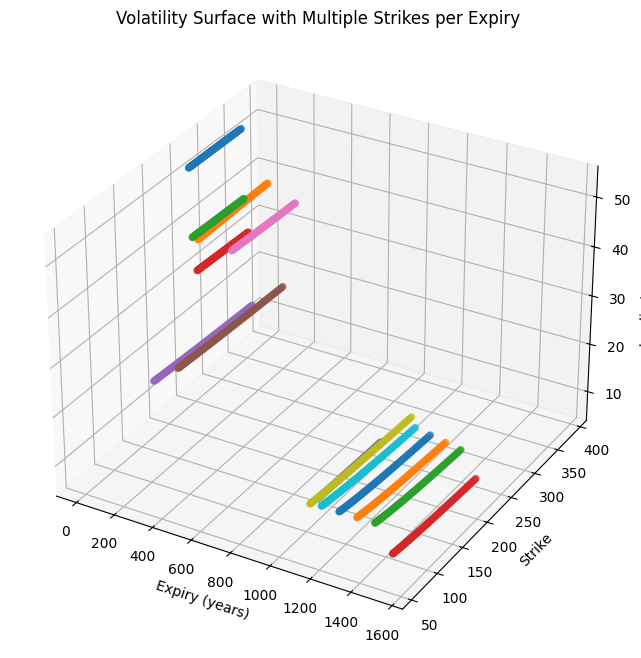

In [74]:
def plot_vol_surface_lines(calibrated_params, data):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for expiry, params in calibrated_params.items():
        T = expiry / 365
        group = data[data['days_until_expiring'] == expiry]
        F = g['underlying_price'].iloc[0] * np.exp(0.1 * T)
        x = np.linspace(np.log(group['strike'].min() / F),
                        np.log(group['strike'].max() / F), 100)

        k = np.mean(group['strike']) * np.exp(x)
        var = svi(params, x)
        vol = np.sqrt(var)
        expiry_array = np.full_like(k, expiry)
        ax.scatter(expiry_array, k, vol, alpha=0.7)

    ax.set_xlabel('Expiry (years)')
    ax.set_ylabel('Strike')
    ax.set_zlabel('Implied Volatility')
    plt.title('Volatility Surface with Multiple Strikes per Expiry')
    plt.show()

plot_vol_surface_lines(calibrated_params, option_data_df)

In [75]:
def plot_vol_surface_plotly_lines(calibrated_params, data):
    fig = go.Figure()

    for expiry, params in calibrated_params.items():
        T = expiry / 365
        group = data[data['days_until_expiring'] == expiry]
        F = group['underlying_price'].iloc[0] * np.exp(0.1 * T)
        x = np.linspace(np.log(group['strike'].min() / F),
                        np.log(group['strike'].max() / F), 100)

        k = np.mean(group['strike']) * np.exp(x)
        var = svi(params, x)
        vol = np.sqrt(var)
        expiry_array = np.full_like(k, expiry)

        fig.add_trace(go.Scatter3d(
            x=expiry_array,
            y=k,
            z=vol,
            mode='markers',
            marker=dict(size=5, opacity=0.7),
            name=f'Expiry: {expiry} days'
        ))

    fig.update_layout(
        scene=dict(
            xaxis_title='Expiry (days)',
            yaxis_title='Strike',
            zaxis_title='Implied Volatility',
        ),
        title='Volatility Surface with Multiple Strikes per Expiry',
        width=800,
        height=600
    )

    fig.show()

plot_vol_surface_plotly_lines(calibrated_params, option_data_df)

In [76]:
def plot_vol_surface(calibrated_params, data):
    expiries = []
    strikes = []
    vols = []

    for expiry, params in calibrated_params.items():
        T = expiry / 365
        group = data[data['days_until_expiring'] == expiry]
        F = group['underlying_price'].iloc[0] * np.exp(0.1 * T)
        
        x = np.linspace(np.log(group['strike'].min() / F),
                        np.log(group['strike'].max() / F), 100)
        
        k = np.mean(group['strike']) * np.exp(x)
        var = svi(params, x)
        vol = np.sqrt(var)

        expiries.extend([expiry] * len(k))
        strikes.extend(k)
        vols.extend(vol)

    expiries = np.array(expiries)
    strikes = np.array(strikes)
    vols = np.array(vols)

    grid_expiry, grid_strike = np.meshgrid(
        np.linspace(expiries.min(), expiries.max(), 100),
        np.linspace(strikes.min(), strikes.max(), 100)
    )

    grid_vols = griddata((expiries, strikes), vols, (grid_expiry, grid_strike), method='cubic')

    fig = go.Figure(data=[go.Surface(z=grid_vols, x=grid_expiry, y=grid_strike)])

    fig.update_layout(
        scene=dict(
            xaxis_title='Expiry (days)',
            yaxis_title='Strike',
            zaxis_title='Implied Volatility'
        ),
        title='Volatility Surface',
        width=800,
        height=600
    )

    fig.show()

plot_vol_surface(calibrated_params, option_data_df)

# Непараметрический подход

попробуем использовать модель хестона:

In [77]:
!pip3 install QuantLib==1.37

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 5.0 MB/s eta 0:00:00a 0:00:01


In [80]:
strikes = option_data_df['strike'].values
days_until_expiring = option_data_df['days_until_expiring'].values
implied_vols = option_data_df['volatility'].values / 100  

len(strikes), len(days_until_expiring), len(implied_vols)

(988, 988, 988)

In [82]:
import QuantLib as ql

In [ ]:
today = ql.Date(9, 4, 2025)
ql.Settings.instance().evaluationDate = today
calendar = ql.NullCalendar()

# Параметры базового актива
spot_price = 100
risk_free_rate = 0.05 
dividend_rate = 0.0

# Исправляем создание кривых ставок
risk_free_curve = ql.FlatForward(
    today, 
    ql.QuoteHandle(ql.SimpleQuote(risk_free_rate)), 
    ql.Actual360()
)
dividend_curve = ql.FlatForward(
    today,
    ql.QuoteHandle(ql.SimpleQuote(dividend_rate)),
    ql.Actual360()
)

helpers = []
for strike, maturity, impl_vol in market_data:
    volatility_quote = ql.SimpleQuote(impl_vol)
    
    volatility_handle = ql.QuoteHandle(volatility_quote)
    risk_free_handle = ql.YieldTermStructureHandle(risk_free_curve)
    dividend_handle = ql.YieldTermStructureHandle(dividend_curve)
    
    helper = ql.HestonModelHelper(
        ql.Period(int(maturity * 365), ql.Days),
        calendar,
        spot_price,
        strike,
        volatility_handle,
        risk_free_handle,
        dividend_handle
    )
    helpers.append(helper)
    print(spot_price, )

# Инициализация модели (используем созданные кривые)
initial_params = ql.Array(5)
initial_params[0] = 0.1  # v0
initial_params[1] = 0.1  # kappa
initial_params[2] = 0.1  # theta
initial_params[3] = 0.1  # sigma
initial_params[4] = -0.5 # rho

process = ql.HestonProcess(
    risk_free_handle,
    dividend_handle,
    ql.QuoteHandle(ql.SimpleQuote(spot_price)),
    initial_params[0],  # v0
    initial_params[1],  # kappa
    initial_params[2],  # theta
    initial_params[3],  # sigma
    initial_params[4]   # rho
)

model = ql.HestonModel(process)

optimizer = ql.LevenbergMarquardt(1e-8, 1e-8, 1e-8)
model.calibrate(helpers, optimizer, ql.EndCriteria(1000, 100, 1e-8, 1e-8, 1e-8))

print("Calibrated Parameters:")
print(f"v0 = {model.v0():.4f}")
print(f"kappa = {model.kappa():.4f}")
print(f"theta = {model.theta():.4f}")
print(f"sigma = {model.sigma():.4f}")
print(f"rho = {model.rho():.4f}")

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


RuntimeError: null pricing engine

## либа qfin

In [21]:
import qfin

In [24]:
s = 145.38
t = 6/252
k = 145
r = 0.01

op = 3.00

In [27]:
qfin.options.BlackScholesCall(s, .5, k, t, r).price

4.677469378835454